### Group:
    
__Member1__

__Member2__

### Group:

__Mihir Patil__

__Sushma Devaramani__

__Vishwas__

## Rabbit-Growth problem:

We have a population $p(n)$ of rabbit pairs. Each rabbit pair gives birth to a new rabbit pair every season $n$.
The start conditions are p(0) = 1 and p(1) = 2.

### Task 1:
Formulate the problem using a difference equation (how is the population in season $n$ related to the population in seasons $n+1$ and $n+2$ ) ? 


The difference equation for the above problem is given by,

$$
\begin{equation}
    p_n = p r^{n-1}
\end{equation}
$$

where, $r$ is the common ratio.  

The relation between $p_n$ and $p_{n+1}, p_{n+2}$ is given by,

$$
\begin{equation}
    p_{n+1} = r p_n \\
    p_{n+2} = r^2 p_n
\end{equation}
$$

### Task 2: 
Plot the population for the first 10 years under the assumption that in season 0 there is one pair of rabbits.

Use a recursive function and count the number of times the function calls itself. Plot this alongside the population.

In [61]:
import matplotlib.pyplot as plt

In [79]:
def countit(stop_val,p,r,count):
    if count <= stop_val:
        pn = p*r**(count-1)
        plt.bar(count,pn)
        count = countit(stop_val,p,r,count+1) 
    plt.xlabel('Function calls (Seasons)')
    plt.ylabel('Rabbit population in pairs')
    return count

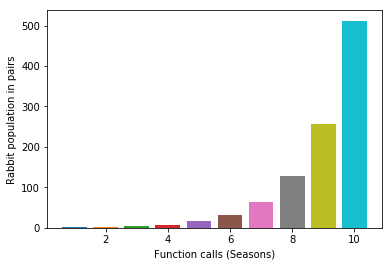

In [80]:
count = 1
p = 1
r = 2
stop_val = 10
final_count = countit(stop_val,p,r,count)

## Z-Transform

The Z-Transform of a function $f(n)$ is defined as:

$F(z) = \sum_{n=-\infty}^{\infty} \frac{f(n)}{z^n}$

(see also: https://en.wikipedia.org/wiki/Z-transform)

Since we assume that for negative timesteps $n < 0$, there were no rabbit pairs we can use the unilateral Z-transform:

$F(z) = \sum_{n=0}^{\infty} \frac{f(n)}{z^n}$

### Task 3:

Write down the Z-transform for the difference equation found in Task 1. After simplifying there should be no summation signs left.
(Hint: You can shift sums with different indices to combine them)

*Answer:*

The unilateral z-transform is given by,

$$
\begin{equation}
F(Z) = \sum_{n=0}^\infty \frac{P(n)}{z^n} = \sum_{n=0}^\infty \frac{p r^{n-1}}{z^n} \\
F(Z) = p \big\{ \frac{1}{r} + \frac{1}{z} + \frac{r}{z} + \big(\frac{r}{z}\big)^2 + .... + \big(\frac{r}{z}\big)^n + ... \infty \big\} 
\end{equation}
$$

The simplified Z-transform is, $F(Z) = \frac{p}{r} \big( \frac{z}{z-r} \big)$


### Task 4:

Use partial fraction decomposition to find a closed form expression for the Z-transform computed in Task 3.
(Hint: You can do this with sympy http://mattpap.github.io/scipy-2011-tutorial/html/partfrac.html)

Additional information about using partial fraction decomposition to find the inverse Z-transform can be found under https://dspcan.homestead.com/files/Ztran/zinvpart.htm.

First decompose the Z-transform using sympy into partial fractions and then use a lookup table for the inverse Z-transform to arrive at a closed form for the sequence p(n).

In [91]:
import sympy as syp
from sympy.abc import z

#
f = z/(2*(z - 2))

f_ = apart(f)

f_

1/2 + 1/(z - 2)

From the lookup table, the closed form of the resulting sequence for the transform $F(Z) = \frac{1}{(1-az^{-1})}$ is given by,

$$ a^n u[n] $$

In [92]:
together(f_)

z/(2*(z - 2))